Practice ANN. Styled after Book Example in Ch 10-ageron

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.6.0'

In [3]:
keras.__version__

'2.6.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
y_train_full.shape

(60000,)

In [9]:
y_train_full.dtype

dtype('uint8')

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_valid, X_train= X_train_full[ : 5000]/255, X_train_full [5000 :]/255

In [12]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [13]:
y_valid[1:5]

array([0, 0, 3, 0], dtype=uint8)

In [14]:
import matplotlib.pyplot as plt

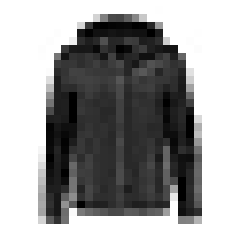

In [15]:
plt.imshow (X_train[0], cmap = 'binary' )
plt.axis ('off')
plt.show ()

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names [y_train[1]]

'T-shirt/top'

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
import numpy as np

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model.layers

In [23]:
model.summary ()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
_________________________________________________________________


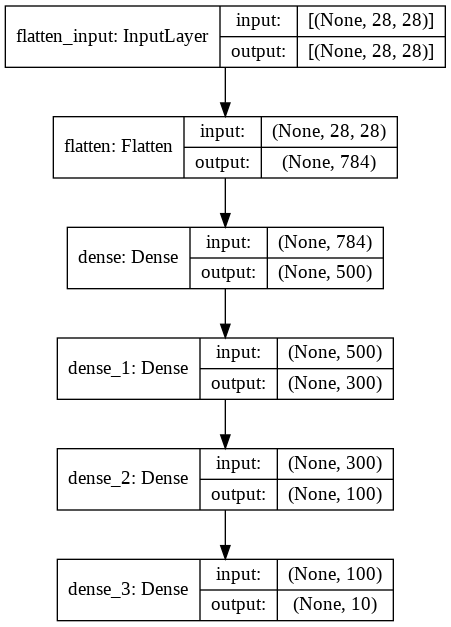

In [24]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [25]:
hidden1 = model.layers[1]
# This is the first hidden layer with 300 neurons

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.02224506,  0.03083178, -0.0122686 , ...,  0.04847746,
        -0.00316433, -0.01515578],
       [-0.02759417, -0.01118364,  0.0507398 , ..., -0.04399914,
         0.00565013, -0.05193627],
       [ 0.06655311,  0.03664307, -0.05802352, ...,  0.00892484,
        -0.02207562, -0.02662601],
       ...,
       [-0.0371199 , -0.027876  , -0.06116788, ...,  0.03094938,
        -0.0232155 , -0.05285604],
       [ 0.03409466, -0.06670204, -0.01421629, ...,  0.04793852,
        -0.0673712 ,  0.04170242],
       [ 0.00733708, -0.02191466, -0.04088402, ...,  0.02908415,
         0.06602233,  0.02880167]], dtype=float32)

In [28]:
weights.shape

(784, 500)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(500,)

In [31]:
y_valid
# Here y_valid is not onehot encoded. Hence sparse categorical cross entropy is used.

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [32]:
model.compile (loss = "sparse_categorical_crossentropy", 
               optimizer = "adam",
               metrics = ["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.4845 - accuracy: 0.8251 - val_loss: 0.3607 - val_accuracy: 0.8706
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3649 - accuracy: 0.8644 - val_loss: 0.3878 - val_accuracy: 0.8630
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3314 - accuracy: 0.8777 - val_loss: 0.3257 - val_accuracy: 0.8838
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3058 - accuracy: 0.8872 - val_loss: 0.3068 - val_accuracy: 0.8890
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2882 - accuracy: 0.8932 - val_loss: 0.3114 - val_accuracy: 0.8870
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2722 - accuracy: 0.8988 - val_loss: 0.3627 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2620 - accuracy: 0.9015 - val_loss: 0.3116 - val_accuracy:

At epoch 15, the best result of loss: 0.1925 - accuracy: 0.9264 - val_loss: 0.3364 - val_accuracy: 0.9010, was obtained.

In [34]:
# model.save('ANN_fashion-minst-1.h5')

# from google.colab import files
# files.download('ANN_fashion-minst-1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
import pandas as pd
import os
from google.colab import files
from pylab import savefig
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    files.download(path)

Saving figure keras_learning_curves_plot-1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

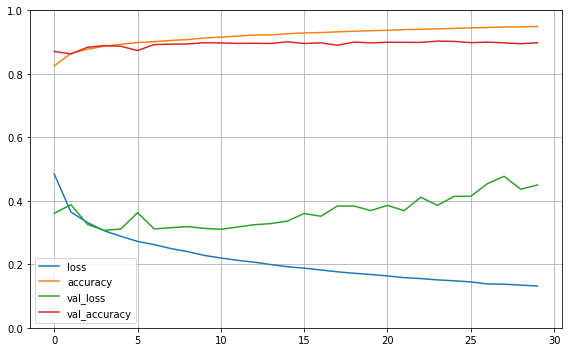

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot-1")
plt.show()

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5049 - accuracy: 0.8901


[0.5049083232879639, 0.8901000022888184]

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
# y_pred = model.predict_classes(X_new)
# y_pred

In [43]:
y_pred1 = np.argmax(model.predict(X_new), axis=-1)

In [44]:
y_pred1

array([9, 2, 1])

In [47]:
# np.array(class_names)[y_pred]

In [48]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

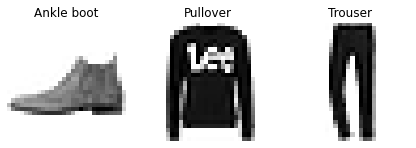

In [49]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Now include regularization

# L1 0.01

In [50]:
!git clone https://github.com/nopynospy/apu_deep_learning.git

Cloning into 'apu_deep_learning'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 84 (delta 34), reused 34 (delta 6), pack-reused 0
Unpacking objects: 100% (84/84), done.


In [51]:
!cd apu_deep_learning/
!ls

ANN_fashion-minst-1.h5	keras_learning_curves_plot-1.png  sample_data
apu_deep_learning	my_fashion_mnist_model.png


In [52]:
model_fashion_minst1 = keras.models.load_model('ANN_fashion-minst-1.h5')
model_fashion_minst1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
_________________________________________________________________


In [55]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

def add_base_layer(classifier, units, isRelu=True):
  if isRelu:
    classifier.add(Dense(units= units , kernel_initializer = 'he_uniform', activation = 'relu'))
  else:
    classifier.add(Dense(units = units, kernel_initializer = 'he_uniform', activation = 'softmax'))
  return(classifier)

def add_l1_l2_layer(classifier, units, regularizer):
  classifier.add(Dense(units = units, activation = 'relu', kernel_regularizer=regularizer))
  return(classifier)

def create_model_l1(layer1=0, layer2=0, layer3=0):
    #Initializing Neural Network
    classifier = Sequential()
    classifier.add(Flatten(input_shape=[28, 28]))
    ##Defining the architecture of ANN
   
    # First layer 
    if layer1==0:
      add_base_layer(classifier, 500)
    else:
      add_l1_l2_layer(classifier, 500, keras.regularizers.l1(layer1))
    # Second layer
    if layer2==0:
      add_base_layer(classifier, 300)
    else:
      add_l1_l2_layer(classifier, 300, keras.regularizers.l1(layer2))
    # Third layer
    if layer3==0:
      add_base_layer(classifier, 100)
    else:
      add_l1_l2_layer(classifier, 100, keras.regularizers.l1(layer3))
    # Adding the output layer
    add_base_layer(classifier, 10, False)

    return classifier
  
model_l1_1 = create_model_l1(layer1 = 0.01)
print(model_l1_1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_5 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
model.compile (loss = "sparse_categorical_crossentropy", 
               optimizer = "adam",
               metrics = ["accuracy"])
model_l1_1_hist  = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1332 - accuracy: 0.9497 - val_loss: 0.4882 - val_accuracy: 0.8996
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1296 - accuracy: 0.9513 - val_loss: 0.5008 - val_accuracy: 0.9014
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1294 - accuracy: 0.9511 - val_loss: 0.5124 - val_accuracy: 0.8976
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1238 - accuracy: 0.9528 - val_loss: 0.4675 - val_accuracy: 0.9022
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1171 - accuracy: 0.9551 - val_loss: 0.4522 - val_accuracy: 0.8942
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1160 - accuracy: 0.9553 - val_loss: 0.5219 - val_accuracy: 0.9018
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1139 - accuracy: 0.9555 - val_loss: 0.5231 - val_accuracy:

At epoch 2, the result was loss: 0.1296 - accuracy: 0.9513 - val_loss: 0.5008 - val_accuracy: 0.9014, which is worse than the original best result in baseline of loss: 0.1925 - accuracy: 0.9264 - val_loss: 0.3364 - val_accuracy: 0.9010

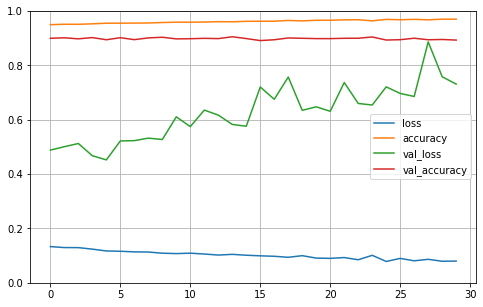

In [57]:
def plot_performance(hist):
  pd.DataFrame(hist.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()

plot_performance(model_l1_1_hist)

Validation loss keeps increasing, while both accuracies do no increase much.

# L1 0.05

In [59]:
model_l1_2 = create_model_l1(layer1 = 0.05)
model.compile (loss = "sparse_categorical_crossentropy", 
               optimizer = "adam",
               metrics = ["accuracy"])
model_l1_2_hist  = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0817 - accuracy: 0.9702 - val_loss: 0.8949 - val_accuracy: 0.8928
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0902 - accuracy: 0.9684 - val_loss: 0.8337 - val_accuracy: 0.9000
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0775 - accuracy: 0.9713 - val_loss: 0.8065 - val_accuracy: 0.8940
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0750 - accuracy: 0.9726 - val_loss: 0.8119 - val_accuracy: 0.8962
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0812 - accuracy: 0.9706 - val_loss: 0.7804 - val_accuracy: 0.8864
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0775 - accuracy: 0.9721 - val_loss: 0.7898 - val_accuracy: 0.8952
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0767 - accuracy: 0.9717 - val_loss: 0.7907 - val_accuracy:

Increasing L1 regularization lead to significant validation loss, even higher than 1 in some epochs.

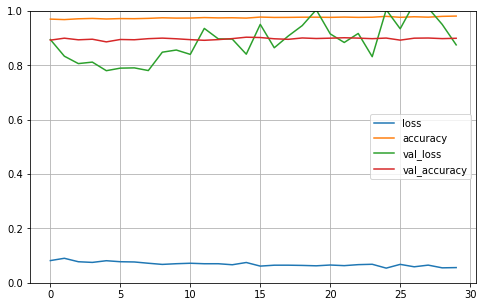

In [60]:
plot_performance(model_l1_2_hist)

# L1 0.01 + L1 0.01

In [61]:
model_l1_3 = create_model_l1(layer1 = 0.01, layer2 = 0.01)
model.compile (loss = "sparse_categorical_crossentropy", 
               optimizer = "adam",
               metrics = ["accuracy"])
model_l1_3_hist  = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0620 - accuracy: 0.9784 - val_loss: 1.1103 - val_accuracy: 0.8940
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0555 - accuracy: 0.9799 - val_loss: 1.0992 - val_accuracy: 0.9042
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0624 - accuracy: 0.9788 - val_loss: 1.1815 - val_accuracy: 0.8958
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0610 - accuracy: 0.9789 - val_loss: 1.0346 - val_accuracy: 0.8984
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0535 - accuracy: 0.9813 - val_loss: 1.0719 - val_accuracy: 0.8962
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0614 - accuracy: 0.9782 - val_loss: 1.1594 - val_accuracy: 0.8986
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0593 - accuracy: 0.9793 - val_loss: 1.0561 - val_accuracy:

Validation loss further increased to the point that it does not even show up on the plot as seen below.

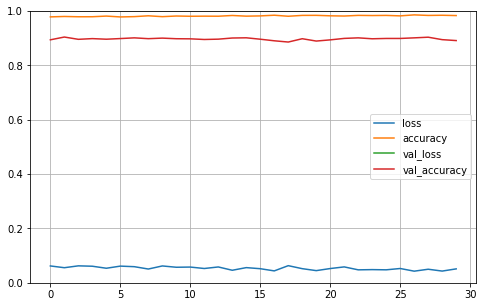

In [62]:
plot_performance(model_l1_3_hist)

# L1 0.01 + L1 0.01 + L1 0.01

In [63]:
model_l1_4 = create_model_l1(layer1 = 0.01, layer2 = 0.01, layer3 = 0.01)
model.compile (loss = "sparse_categorical_crossentropy", 
               optimizer = "adam",
               metrics = ["accuracy"])
model_l1_4_hist  = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0482 - accuracy: 0.9843 - val_loss: 1.5332 - val_accuracy: 0.8960
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0568 - accuracy: 0.9829 - val_loss: 1.4171 - val_accuracy: 0.8940
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0541 - accuracy: 0.9837 - val_loss: 1.3780 - val_accuracy: 0.9024
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0589 - accuracy: 0.9845 - val_loss: 1.2572 - val_accuracy: 0.9004
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0517 - accuracy: 0.9842 - val_loss: 1.2674 - val_accuracy: 0.8990
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0456 - accuracy: 0.9845 - val_loss: 1.2532 - val_accuracy: 0.8990
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0593 - accuracy: 0.9821 - val_loss: 1.4245 - val_accuracy:

While validation loss did not show up as well in this experiment, the overfitting problem is worse, as the validation loss reaches an even higher level.

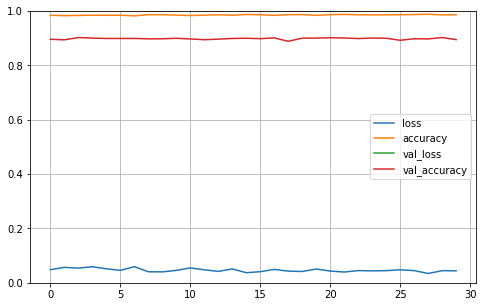

In [64]:
plot_performance(model_l1_4_hist)

# L2 0.01

In [67]:
def create_model_l2(layer1=0, layer2=0, layer3=0):
    #Initializing Neural Network
    classifier = Sequential()
    classifier.add(Flatten(input_shape=[28, 28]))
    ##Defining the architecture of ANN
   
    # First layer 
    if layer1==0:
      add_base_layer(classifier, 500)
    else:
      add_l1_l2_layer(classifier, 500, keras.regularizers.l2(layer1))
    # Second layer
    if layer2==0:
      add_base_layer(classifier, 300)
    else:
      add_l1_l2_layer(classifier, 300, keras.regularizers.l2(layer2))
    # Third layer
    if layer3==0:
      add_base_layer(classifier, 100)
    else:
      add_l1_l2_layer(classifier, 100, keras.regularizers.l2(layer3))
    # Adding the output layer
    add_base_layer(classifier, 10, False)

    return classifier
  
model_l2_1 = create_model_l2(layer1 = 0.01)

model.compile (loss = "sparse_categorical_crossentropy", 
               optimizer = "adam",
               metrics = ["accuracy"])

model_l2_1_hist = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0423 - accuracy: 0.9873 - val_loss: 1.7759 - val_accuracy: 0.9008
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0475 - accuracy: 0.9867 - val_loss: 1.9795 - val_accuracy: 0.9002
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9904 - val_loss: 2.0128 - val_accuracy: 0.8984
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0531 - accuracy: 0.9866 - val_loss: 1.8173 - val_accuracy: 0.8920
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0460 - accuracy: 0.9871 - val_loss: 1.7064 - val_accuracy: 0.8950
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0376 - accuracy: 0.9886 - val_loss: 2.0449 - val_accuracy: 0.8906
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 2.0903 - val_accuracy:

L2 0.01 at layer 1 also has overfitting issue.

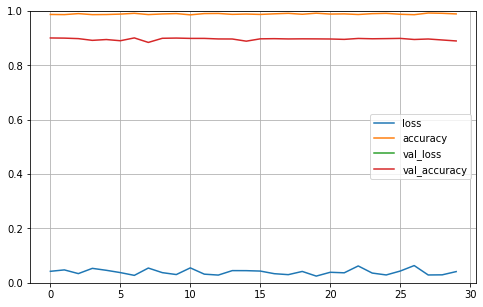

In [68]:
plot_performance(model_l2_1_hist)

# L2 0.05

In [69]:
model_l2_2 = create_model_l2(layer1 = 0.05)

model.compile (loss = "sparse_categorical_crossentropy", 
               optimizer = "adam",
               metrics = ["accuracy"])

model_l2_2_hist = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0405 - accuracy: 0.9892 - val_loss: 2.2316 - val_accuracy: 0.8918
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0455 - accuracy: 0.9889 - val_loss: 2.1188 - val_accuracy: 0.8968
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0441 - accuracy: 0.9888 - val_loss: 1.9754 - val_accuracy: 0.8956
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 2.1117 - val_accuracy: 0.9028
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0337 - accuracy: 0.9903 - val_loss: 1.9897 - val_accuracy: 0.8992
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0500 - accuracy: 0.9872 - val_loss: 2.0594 - val_accuracy: 0.8966
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0343 - accuracy: 0.9909 - val_loss: 1.9687 - val_accuracy:

L2 0.05 at layer 1 also has overfitting issue that reaches more than 2 consistently across epochs.

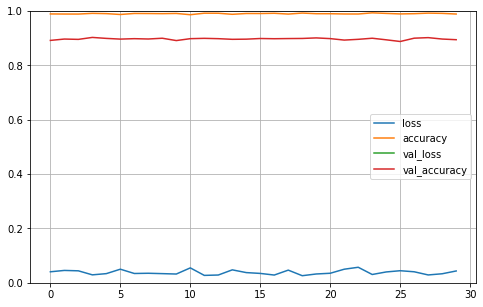

In [70]:
plot_performance(model_l2_2_hist)

# L2 0.01 + L2 0.01

In [72]:
model_l2_3 = create_model_l2(layer1 = 0.01, layer2 = 0.01)

model.compile (loss = "sparse_categorical_crossentropy", 
               optimizer = "adam",
               metrics = ["accuracy"])

model_l2_3_hist = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0396 - accuracy: 0.9895 - val_loss: 2.5779 - val_accuracy: 0.8998
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0612 - accuracy: 0.9881 - val_loss: 2.5309 - val_accuracy: 0.8992
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0313 - accuracy: 0.9922 - val_loss: 2.3930 - val_accuracy: 0.8940
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0392 - accuracy: 0.9913 - val_loss: 2.7709 - val_accuracy: 0.8920
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0327 - accuracy: 0.9914 - val_loss: 2.7468 - val_accuracy: 0.8868
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 3.3121 - val_accuracy: 0.8968
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0373 - accuracy: 0.9895 - val_loss: 2.5410 - val_accuracy:

Validation loss reaches 3 in some epochs, further worsening the overfitting.

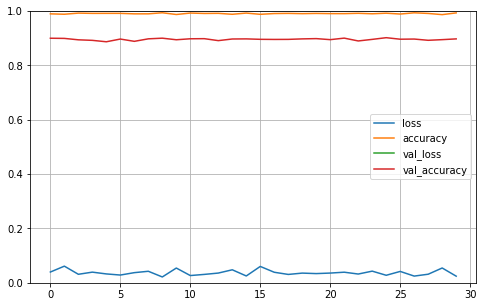

In [73]:
plot_performance(model_l2_3_hist)

# L2 0.01 + L2 0.01 + L2 0.01

In [74]:
model_l2_4 = create_model_l2(layer1 = 0.01, layer2 = 0.01, layer3 = 0.01)

model.compile (loss = "sparse_categorical_crossentropy", 
               optimizer = "adam",
               metrics = ["accuracy"])

model_l2_4_hist = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0327 - accuracy: 0.9914 - val_loss: 3.2220 - val_accuracy: 0.8994
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0655 - accuracy: 0.9870 - val_loss: 2.2927 - val_accuracy: 0.8958
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0327 - accuracy: 0.9923 - val_loss: 3.1336 - val_accuracy: 0.8882
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0428 - accuracy: 0.9904 - val_loss: 2.6358 - val_accuracy: 0.8912
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0339 - accuracy: 0.9906 - val_loss: 2.7904 - val_accuracy: 0.8930
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0344 - accuracy: 0.9912 - val_loss: 2.8625 - val_accuracy: 0.8966
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0345 - accuracy: 0.9918 - val_loss: 2.6133 - val_accuracy:

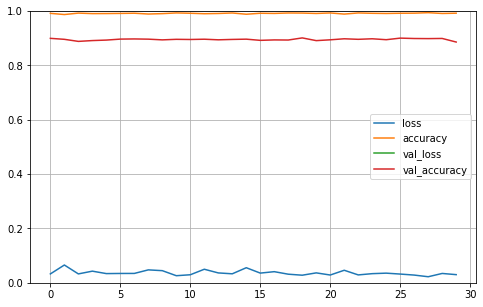

In [75]:
plot_performance(model_l2_4_hist)

# Conclusion: baseline model still achieved the best result, at epoch 15 with best result of loss: 0.1925 - accuracy: 0.9264 - val_loss: 0.3364 - val_accuracy: 0.9010, was obtained.